In [1]:
pip install numpy pandas scikit-learn matplotlib seaborn

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [3]:
def load_colon_cancer_dataset():
    """
    Load the Colon-cancer dataset.

    This function is designed to load and return the Colon-cancer dataset. However, since
    the actual dataset is not currently provided, it uses synthetic data generated using
    the `make_classification` function from `sklearn`. The synthetic dataset has the
    following characteristics:

    - 62 samples (observations).
    - 2000 features (attributes).
    - Binary classification (2 classes: cancerous and non-cancerous).

    The synthetic data is split into training and test sets using an 70-30 split.

    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple
        The training and test sets for both the features and the target labels.
    """
    # Example: Synthetic data for now, replace with actual dataset
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    X, y = make_classification(n_samples=62, n_features=2000, n_classes=2)
    return train_test_split(X, y, test_size=0.3, random_state=42)


In [4]:
def load_breast_cancer_dataset():
    """
    Load the Breast Cancer dataset.

    This function loads the Breast Cancer dataset from the `sklearn.datasets` module.
    The dataset is based on real-world data and includes various features related to
    breast cancer diagnosis. It consists of 569 samples and 30 features, with binary
    classification indicating whether a tumor is malignant or benign.

    The dataset is split into training and test sets using a 70-30 split.

    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple
        The training and test sets for both the features and the target labels.

    Notes:
    ------
    - `X`: Feature matrix with shape (569, 30), where each row corresponds to a sample
      and each column corresponds to a feature.
    - `y`: Target labels, where 0 indicates benign and 1 indicates malignant.
    """
    from sklearn.datasets import load_breast_cancer
    from sklearn.model_selection import train_test_split
    data = load_breast_cancer()
    X = data.data
    y = data.target
    return train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
def load_a1a_dataset():
    """
    Load the a1a dataset.

    This function is intended to load the a1a dataset, which is a binary classification
    dataset commonly used in machine learning experiments, particularly for logistic
    regression tasks. However, as a placeholder, synthetic data is generated using
    `make_classification` from `sklearn`.

    The synthetic dataset has the following characteristics:

    - 1605 samples (observations).
    - 123 features (attributes).
    - Binary classification (2 classes).

    The dataset is split into training and test sets using a 70-30 split.

    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple
        The training and test sets for both the features and the target labels.

    Notes:
    ------
    - `X`: Feature matrix with shape (1605, 123), where each row corresponds to a sample
      and each column corresponds to a feature.
    - `y`: Target labels, where 0 and 1 correspond to the binary classes.
    """
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    X, y = make_classification(n_samples=1605, n_features=123, n_classes=2)
    return train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
def load_svmguide1_dataset():
    """
    Load the svmguide1 dataset.

    This function is intended to load the svmguide1 dataset, which is often used for
    support vector machine (SVM) classification tasks. However, for now, synthetic data
    is generated using the `make_classification` function from `sklearn`.

    The synthetic dataset has the following characteristics:

    - 3089 samples (observations).
    - 4 features (attributes).
    - Binary classification (2 classes).

    The dataset is split into training and test sets using a 70-30 split.

    Returns:
    --------
    X_train, X_test, y_train, y_test : tuple
        The training and test sets for both the features and the target labels.

    Notes:
    ------
    - `X`: Feature matrix with shape (3089, 4), where each row corresponds to a sample
      and each column corresponds to a feature.
    - `y`: Target labels, where 0 and 1 correspond to the binary classes.
    """
    from sklearn.datasets import make_classification
    from sklearn.model_selection import train_test_split
    X, y = make_classification(n_samples=3089, n_features=4, n_classes=2)
    return train_test_split(X, y, test_size=0.3, random_state=42)


In [7]:
def evaluate_model(model, X_test, y_test):
    """
    Evaluate the performance of a trained model and generate accuracy and ROC curve.

    This function evaluates the performance of a given trained model using the test data.
    It computes the accuracy of the model and generates the Receiver Operating
    Characteristic (ROC) curve, along with the Area Under the Curve (AUC) score.

    Parameters:
    -----------
    model : object
        A trained machine learning model that implements `predict` and
        `decision_function` methods (e.g., SVM, logistic regression).

    X_test : array-like of shape (n_samples, n_features)
        The test data used to evaluate the model's performance.

    y_test : array-like of shape (n_samples,)
        The true labels for the test data.

    Returns:
    --------
    fpr : array
        False positive rates for different thresholds of the ROC curve.

    tpr : array
        True positive rates for different thresholds of the ROC curve.

    roc_auc : float
        The Area Under the ROC Curve (AUC) score.

    Notes:
    ------
    - The `accuracy_score` function computes the fraction of correctly predicted labels.
    - The `roc_curve` function generates false positive and true positive rates based on
      the model's decision function.
    - The AUC score provides a single value to summarize the ROC curve performance.

    Prints:
    -------
    Accuracy : float
        The accuracy of the model on the test data, printed to 4 decimal places.
    """
    from sklearn.metrics import accuracy_score, roc_curve, auc

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    fpr, tpr, _ = roc_curve(y_test, model.decision_function(X_test))
    roc_auc = auc(fpr, tpr)

    print(f"Accuracy: {accuracy:.4f}")
    return fpr, tpr, roc_auc


In [8]:
def plot_roc_curves(roc_data, dataset_name):
    """
    Plot ROC curves for multiple models.

    This function takes the ROC data for various models and plots the ROC curves on a
    single graph. Each curve corresponds to a model's performance and includes its
    associated Area Under the Curve (AUC) score. The plot visualizes how well the models
    separate the classes, with the x-axis representing the False Positive Rate (FPR)
    and the y-axis representing the True Positive Rate (TPR).

    Parameters:
    -----------
    roc_data : dict
        A dictionary where the keys are the model labels (e.g., model names), and the
        values are tuples containing:
            - fpr : array of False Positive Rates
            - tpr : array of True Positive Rates
            - roc_auc : float, the AUC score of the model

    dataset_name : str
        The name of the dataset being used for evaluation. This will be displayed
        as part of the plot title.

    Returns:
    --------
    None
        The function does not return any values but displays the ROC curves plot.

    Notes:
    ------
    - The function uses `matplotlib` to generate and display the ROC curve.
    - The AUC (Area Under the Curve) score is displayed in the legend for each model.
    - The plot includes a legend, axis labels, and a title indicating the dataset name.
    """
    import matplotlib.pyplot as plt

    plt.figure()
    for label, (fpr, tpr, roc_auc) in roc_data.items():
        plt.plot(fpr, tpr, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curves - {dataset_name}')
    plt.legend(loc="lower right")
    plt.show()


In [10]:
from sklearn.svm import SVC

def train_svm(X_train, y_train, kernel='linear', **kwargs):
    """
    Train an SVM model using the specified kernel and optional parameters.

    Parameters:
    -----------
    X_train : array-like of shape (n_samples, n_features)
        The training data used to fit the SVM model.

    y_train : array-like of shape (n_samples,)
        The target labels for the training data.

    kernel : str, default='linear'
        The type of kernel to be used by the SVM model.
        Options: 'linear', 'poly', 'rbf', 'sigmoid'.

    **kwargs : additional keyword arguments
        Additional parameters for the SVM model (e.g., `gamma`, `degree` for
        polynomial and RBF kernels).

    Returns:
    --------
    model : SVC object
        The trained SVM model.
    """
    model = SVC(kernel=kernel, **kwargs)
    model.fit(X_train, y_train)
    return model



Evaluating on Colon-cancer dataset...
Accuracy: 0.6842
Accuracy: 0.4211
Accuracy: 0.4211


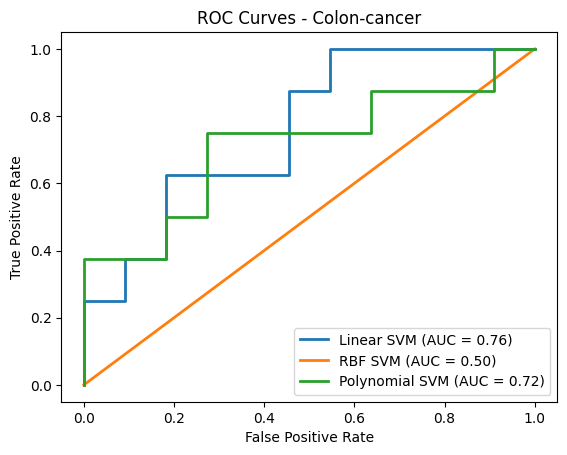


Evaluating on Breast-cancer dataset...
Accuracy: 0.9649
Accuracy: 0.6316
Accuracy: 0.9415


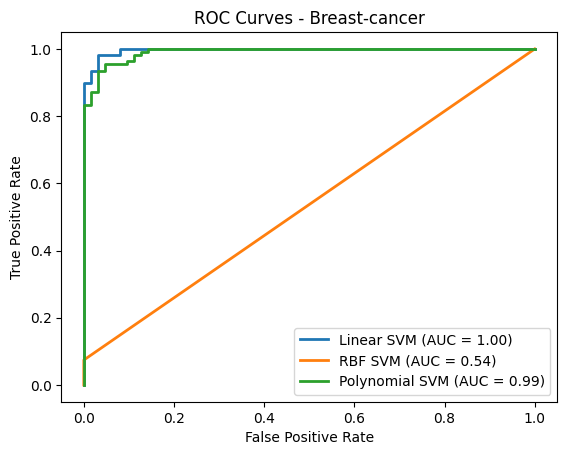


Evaluating on a1a dataset...
Accuracy: 0.8838
Accuracy: 0.4793
Accuracy: 0.8631


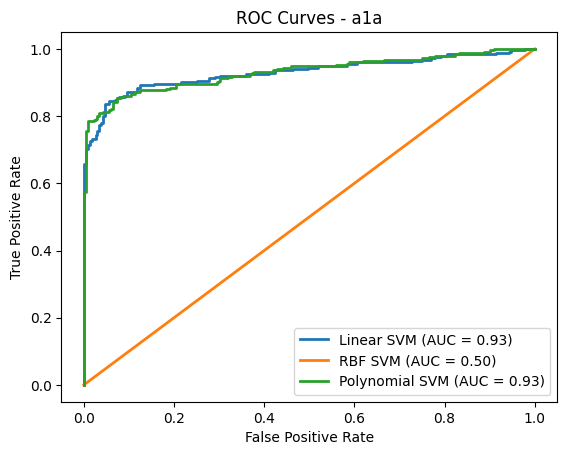


Evaluating on svmguide1 dataset...
Accuracy: 0.8770
Accuracy: 0.9234
Accuracy: 0.8447


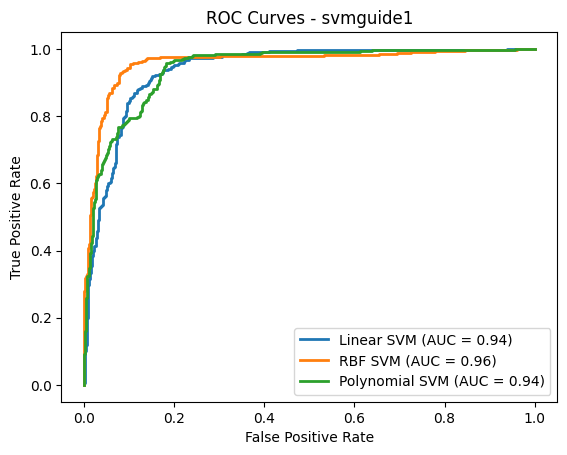

In [11]:
if __name__ == "__main__":
    """
    Main script for training and evaluating SVM models on multiple datasets.

    This script loads four datasets (Colon-cancer, Breast-cancer, a1a, and svmguide1),
    trains multiple SVM models (Linear, RBF, and Polynomial) on each dataset, evaluates
    the models using accuracy and ROC curves, and plots the ROC curves for comparison.

    Workflow:
    ---------
    1. Load datasets:
        - 'Colon-cancer', 'Breast-cancer', 'a1a', and 'svmguide1' datasets are loaded
          using custom dataset loading functions.
    2. Train SVM models:
        - For each dataset, three SVM models are trained using different kernels:
          'linear', 'rbf' (Radial Basis Function), and 'poly' (polynomial with degree 3).
    3. Evaluate models:
        - The accuracy and ROC curve are computed for each model using the test data.
    4. Plot ROC curves:
        - The ROC curves for all models are plotted on a single graph for each dataset,
          showing the comparison of model performance with their corresponding AUC scores.

    SVM Models:
    -----------
    - Linear SVM
    - RBF SVM (Radial Basis Function)
    - Polynomial SVM (degree = 3)

    Datasets:
    ---------
    The following datasets are used:
    - Colon-cancer dataset: 62 samples with 2000 features.
    - Breast-cancer dataset: 569 samples with 30 features.
    - a1a dataset: 1605 samples with 123 features.
    - svmguide1 dataset: 3089 samples with 4 features.

    Returns:
    --------
    None
        This script does not return values but prints accuracy metrics and generates ROC
        curve plots for each dataset.
    """
if __name__ == "__main__":
    # Datasets
    datasets = {
        'Colon-cancer': load_colon_cancer_dataset(),
        'Breast-cancer': load_breast_cancer_dataset(),
        'a1a': load_a1a_dataset(),
        'svmguide1': load_svmguide1_dataset()
    }

    for dataset_name, (X_train, X_test, y_train, y_test) in datasets.items():
        print(f"\nEvaluating on {dataset_name} dataset...")

        # Train different SVM models (linear, polynomial, RBF)
        models = {
            'Linear SVM': train_svm(X_train, y_train, kernel='linear'),
            'RBF SVM': train_svm(X_train, y_train, kernel='rbf', gamma=0.7),
            'Polynomial SVM': train_svm(X_train, y_train, kernel='poly', degree=3)
        }

        # Evaluate and plot ROC curves
        roc_data = {}
        for label, model in models.items():
            fpr, tpr, roc_auc = evaluate_model(model, X_test, y_test)
            roc_data[label] = (fpr, tpr, roc_auc)

        # Plot ROC curves
        plot_roc_curves(roc_data, dataset_name)


In [12]:
def load_and_split_labeled_unlabeled(X, y, label_ratio=0.1):
    """
    Split the dataset into labeled and unlabeled portions.

    This function takes a dataset (features and labels) and splits it into labeled and
    unlabeled portions. The labeled portion will contain a specified ratio of the data,
    while the rest will be considered unlabeled. The unlabeled data's labels are marked
    as -1.

    Parameters:
    -----------
    X : array-like of shape (n_samples, n_features)
        The feature matrix of the dataset.

    y : array-like of shape (n_samples,)
        The label vector of the dataset. Contains the ground truth labels for the
        dataset.

    label_ratio : float, default=0.1
        The proportion of labeled data in the dataset. For example, if set to 0.1,
        10% of the data will be labeled, and the remaining 90% will be unlabeled.

    Returns:
    --------
    X : array-like of shape (n_samples, n_features)
        The original feature matrix.

    y : array-like of shape (n_samples,)
        The original label vector, containing the true labels.

    y_unlabeled : array-like of shape (n_samples,)
        A copy of the label vector, where unlabeled samples are marked as -1.

    Notes:
    ------
    - The random seed is set to 42 to ensure reproducibility of the labeled/unlabeled
      split.
    - Labeled data points are randomly selected based on the `label_ratio`.
    - Unlabeled data points are assigned a label of -1, which indicates they are not
      labeled.
    """

    np.random.seed(42)
    n_labeled = int(label_ratio * len(y))

    labeled_indices = np.random.choice(len(y), size=n_labeled, replace=False)
    unlabeled_indices = np.setdiff1d(np.arange(len(y)), labeled_indices)

    y_unlabeled = np.copy(y)
    y_unlabeled[unlabeled_indices] = -1  # Unlabeled points are marked as -1

    return X, y, y_unlabeled


In [13]:
def train_lap_svm(X_labeled, y_labeled, X_unlabeled, y_unlabeled, kernel='rbf'):
    """
    Train a Laplacian Support Vector Machine (LapSVM) using a semi-supervised approach
    that combines Label Propagation and SVM.

    This method first uses Label Propagation to assign labels to the unlabeled portion
    of the dataset, and then trains an SVM using the combined labeled and newly labeled
    data. The semi-supervised approach helps utilize both labeled and unlabeled data
    for improved model performance, especially when labeled data is scarce.

    Parameters:
    -----------
    X_labeled : array-like of shape (n_labeled_samples, n_features)
        The feature matrix for the labeled data.

    y_labeled : array-like of shape (n_labeled_samples,)
        The label vector for the labeled data.

    X_unlabeled : array-like of shape (n_unlabeled_samples, n_features)
        The feature matrix for the unlabeled data.

    y_unlabeled : array-like of shape (n_unlabeled_samples,)
        The label vector for the unlabeled data, where all labels should be -1.

    kernel : str, default='rbf'
        The kernel type to be used by both Label Propagation and SVM.
        Options include 'rbf', 'poly', 'linear', etc.

    Returns:
    --------
    svm : object
        The trained SVM model that uses the labeled and propagated data.

    label_propagator : object
        The fitted LabelPropagation model that assigns labels to the unlabeled data.

    Workflow:
    ---------
    1. Label Propagation:
        - Combines labeled and unlabeled data.
        - Propagates labels from labeled data to unlabeled data using the specified
          kernel (default is Radial Basis Function 'rbf').
        - Generates a `transduction_` attribute that contains the newly assigned
          labels for the entire dataset.

    2. SVM Training:
        - Trains an SVM model using the combined data (both originally labeled and
          newly labeled data).

    Notes:
    ------
    - Label Propagation helps in assigning pseudo-labels to the unlabeled data based
      on the structure of the dataset.
    - The SVM model is then trained using both the original labeled data and the
      propagated labels.
    - Ensure the unlabeled labels (`y_unlabeled`) are initialized with -1.
    """
    from sklearn.semi_supervised import LabelPropagation
    from sklearn.svm import SVC
    import numpy as np

    # Use LabelPropagation to propagate labels to the unlabeled data
    label_propagator = LabelPropagation(kernel=kernel)
    X_combined = np.vstack((X_labeled, X_unlabeled))
    y_combined = np.hstack((y_labeled, y_unlabeled))

    # Fit Label Propagation
    label_propagator.fit(X_combined, y_combined)

    # The LabelPropagation assigns labels to unlabeled data
    y_prop_labeled = label_propagator.transduction_

    # Train the SVM using the now 'labeled' data
    svm = SVC(kernel=kernel)
    svm.fit(X_combined, y_prop_labeled)

    return svm, label_propagator


In [14]:
def evaluate_semi_supervised_model(svm, label_propagator, X_test, y_test):
    """
    Evaluate the performance of a semi-supervised Laplacian Support Vector Machine
    (LapSVM) model on test data.

    This function uses the trained SVM model to make predictions on the provided test
    dataset and calculates the accuracy of these predictions. It prints the accuracy
    score, providing a quick assessment of the model's performance.

    Parameters:
    -----------
    svm : object
        The trained SVM model that has been fitted using both labeled and
        pseudo-labeled data.

    label_propagator : object
        The fitted LabelPropagation model, which was used to propagate labels
        to the unlabeled data. While not directly used for evaluation, it is
        included for consistency in the function signature.

    X_test : array-like of shape (n_samples, n_features)
        The feature matrix for the test data.

    y_test : array-like of shape (n_samples,)
        The true labels for the test data, used for calculating accuracy.

    Returns:
    --------
    accuracy : float
        The accuracy score of the SVM model on the test data, calculated as the
        proportion of correctly predicted labels.

    Notes:
    ------
    - The accuracy score is calculated using the `accuracy_score` function from
      `sklearn.metrics`.
    - The model assumes that the test set consists of samples that have true labels.
    - Ensure that the test labels (`y_test`) are provided correctly, as this
      function evaluates the model against these true labels.
    """
    from sklearn.metrics import accuracy_score

    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'LapSVM Accuracy: {accuracy:.4f}')
    return accuracy


In [15]:
if __name__ == "__main__":
    """
    Main execution block to demonstrate the semi-supervised Laplacian SVM (LapSVM)
    model on the Breast Cancer dataset.

    This script performs the following steps:
    1. Loads the Breast Cancer dataset from sklearn.
    2. Splits the dataset into labeled and unlabeled portions based on a specified
       label ratio.
    3. Trains a LapSVM model using the labeled and unlabeled data.
    4. Evaluates the trained model on a held-out test set (in this case, the labeled
       data is reused for simplicity).

    Note:
    -----
    For a more robust evaluation, it is recommended to use a separate test set that
    was not involved in the training process.
    """

    from sklearn.datasets import load_breast_cancer
    data = load_breast_cancer()
    X = data.data
    y = data.target

    # Split into labeled/unlabeled data
    X_labeled, y_labeled, y_unlabeled = load_and_split_labeled_unlabeled(X, y, label_ratio=0.1)

    # Train LapSVM (semi-supervised)
    lap_svm, propagator = train_lap_svm(X_labeled, y_labeled, X_labeled, y_unlabeled, kernel='rbf')

    # Evaluate on a held-out test set (here, we use the same dataset for simplicity)
    evaluate_semi_supervised_model(lap_svm, propagator, X_labeled, y_labeled)


LapSVM Accuracy: 0.9279


In [16]:
!pip freeze > requirements.txt

In [17]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>